# Contents
1. Importing Libraries
2. Preparing Data
3. Data Cleaning<br>
    a. Removing extra spaces<br>
    b. Removing stopwords<br>
    c. Removing punctuations<br>
    d. Lemmetizing to root form<br>
4. Data Visualization

# 1. Importing Libraries

In [1]:
# importing required modules
import PyPDF2
import pandas as pd
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter  #process_pdf
from pdfminer.pdfpage import PDFPage
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
import re
from io import StringIO
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from plotly.offline import init_notebook_mode, iplot
import cufflinks as cf

# 2. Preparing data

create_df() creates a dataframe containing the book title and author information

In [2]:
# Creating a dataframe to Store information about books
author = []
title = []
def create_df(new_author, new_title):
    author.append(new_author)
    title.append(new_title)
    df = pd.DataFrame(zip(title,author), columns = ['Title','Author'])
    return df

extract_information() returns the number of pages in the book

In [3]:
# Extracting number of pages
from PyPDF2 import PdfFileReader

def extract_information(pdf_path):
    with open(pdf_path, 'rb') as f:
        pdf = PdfFileReader(f)
        information = pdf.getDocumentInfo()
        number_of_pages = pdf.getNumPages()
    return number_of_pages

pdf_to_text() reads the book in pdf format and returns it as a text

In [4]:
# Extracting text
def pdf_to_text(pdfname):

    # PDFMiner boilerplate
    rsrcmgr = PDFResourceManager()
    sio = StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, sio, laparams=laparams)
    interpreter = PDFPageInterpreter(rsrcmgr, device)

    # Extract text
    fp = open(pdfname, 'rb')
    for page in PDFPage.get_pages(fp):
        interpreter.process_page(page)
    fp.close()

    # Get text from StringIO
    text = sio.getvalue()

    # Cleanup
    device.close()
    sio.close()

    return text

### Converting pdf to text

In [5]:
path = '/Users/apple/Downloads/Rich-Dad-Poor-Dad-eBook.pdf'
num_pages = []
num_pages.append(extract_information(path) )
text = []
text.append(pdf_to_text(path))
df = create_df('Robert Kiyosaki and Sharon Lechter','Rich Dad Poor Dad')

In [6]:
len(text[0])

367969

In [7]:
text[0][:100]

'\x0c“Rich Dad Poor Dad is a starting point for anyone looking to  gain control of their financial futur'

In [8]:
path = '/Users/apple/Downloads/An Imaginary Tale_ The Story of i  the square root of minus one ( PDFDrive ).pdf'
num_pages.append(extract_information(path) )
text.append(pdf_to_text(path))
df = create_df('Paul J. Nahin','An Imaginary Tale_ The Story of i the square root of minus one')

In [9]:
path = '/Users/apple/Downloads/Boundaries_ When to Say Yes, How to Say No to Take Control of Your Life ( PDFDrive ).pdf'
num_pages.append(extract_information(path) )
text.append(pdf_to_text(path))
df = create_df('Henry Cloud, John Townsend','Boundaries_ When to Say Yes, How to Say No to Take Control of Your Life')

In [10]:
path = '/Users/apple/Downloads/Evil_ The Science Behind Humanity’s Dark Side ( PDFDrive ).pdf'
num_pages.append(extract_information(path) )
text.append(pdf_to_text(path))
df = create_df('Julia Shaw','Evil_ The Science Behind Humanity’s Dark Side')

In [11]:
path = '/Users/apple/Downloads/Fallen_Angels_and_the_Origins_of_Evil_Elizabeth_Clare_Prophet.pdf'
num_pages.append(extract_information(path) )
text.append(pdf_to_text(path))
df = create_df('Elizabeth Clare Prophet','Fallen_Angels_and_the_Origins_of_Evil_Elizabeth_Clare_Prophet')

In [12]:
path = '/Users/apple/Downloads/Harry Potter ve Ateş Kadehi - J. K. Rowling ( PDFDrive ).pdf'
num_pages.append(extract_information(path) )
text.append(pdf_to_text(path))
df = create_df('J.K. Rowling','Harry Potter ve Ateş Kadehi - J. K. Rowling')

In [13]:
path = '/Users/apple/Downloads/Living in the Light A guide to personal transformation - PDF Room_unlocked.pdf'
num_pages.append(extract_information(path) )
text.append(pdf_to_text(path))
df = create_df('Shakti Gawain','Living in the Light')

In [14]:
path = '/Users/apple/Downloads/See You At The Top ( PDFDrive ).pdf'
num_pages.append(extract_information(path) )
text.append(pdf_to_text(path))
df = create_df('Zig Ziglar','See You At The Top')

In [15]:
path = '/Users/apple/Downloads/Sentiment in the Forex Market - Indicators and Strategies To Profit from Crowd Behavior and Market Extremes 2008.pdf'
num_pages.append(extract_information(path) )
text.append(pdf_to_text(path))
df = create_df('Jamie Saettele','Sentiment in the Forex Market_ Indicators and Strategies To Profit from Crowd Behavior and Market Extremes')

In [16]:
path = '/Users/apple/Downloads/Start Where You Are_ A Guide to Compassionate Living ( PDFDrive ).pdf'
num_pages.append(extract_information(path) )
text.append(pdf_to_text(path))
df = create_df('Pema Chodron','Start Where You Are_ A Guide to Compassionate Living')

In [17]:
path = '/Users/apple/Downloads/Subliminal Psychology 101_ How to Stealthily Penetrate, Influence, and Subdue Anyone’s Mind Without Them Suspecting a Thing ( PDFDrive ).pdf'
num_pages.append(extract_information(path) )
text.append(pdf_to_text(path))
df = create_df('Michael Pace','Subliminal Psychology 101_ How to Stealthily Penetrate, Influence, and Subdue Anyone’s Mind Without Them Suspecting a Thing')

In [18]:
path = '/Users/apple/Downloads/The Dark Side of Personality_ Science and Practice in Social, Personality, and Clinical Psychology ( PDFDrive ).pdf'
num_pages.append(extract_information(path) )
text.append(pdf_to_text(path))
df = create_df('Virgil Zeiglar-Hill, David K. Marcus','The Dark Side of Personality_ Science and Practice in Social, Personality, and Clinical Psychology')

In [19]:
path = '/Users/apple/Downloads/the-time-machine.pdf'
num_pages.append(extract_information(path) )
text.append(pdf_to_text(path))
df = create_df('H. G. Wells','The Time Machine')

In [20]:
path = '/Users/apple/Downloads/world-of-warcraft-2009-arthas-rise-of-the-lich-king-christie-golden.pdf'
num_pages.append(extract_information(path) )
text.append(pdf_to_text(path))
df = create_df('Christie Golden','World of Warcraft - Arthas Rise of the Lich king')

### Final Dataframe

In [21]:
df['Number of Pages'] = num_pages
df['Text'] = text
df

,Title,Author,Number of Pages,Text
0,Rich Dad Poor Dad,Robert Kiyosaki and Sharon Lechter,220,“Rich Dad Poor Dad is a starting point for an...
1,An Imaginary Tale_ The Story of i the square r...,Paul J. Nahin,297,An Imaginary Tale\n\n An Imaginary Tale\n\n...
2,"Boundaries_ When to Say Yes, How to Say No to ...","Henry Cloud, John Townsend",357,01.Boundaries 6/7/01 5:04 PM Page 2\n\nRes...
3,Evil_ The Science Behind Humanity’s Dark Side,Julia Shaw,221,Also\tby\tDr.\tJulia\tShaw\n\nThe\tMemory\tIl...
4,Fallen_Angels_and_the_Origins_of_Evil_Elizabet...,Elizabeth Clare Prophet,455,\n\n1 \n\n \n\n \n\n \n\n2 \n\n \n\n \n\n \...
5,Harry Potter ve Ateş Kadehi - J. K. Rowling,J.K. Rowling,912,Harry Potter\n\nve\n\nAteş Kadehi\n\nJ. K. Ro...
6,Living in the Light,Shakti Gawain,258,LIL Quark-FM 1/22/01 8:42 AM Page i\n\nLIV...
7,See You At The Top,Zig Ziglar,386,I BELIEVE \n\nYou can get everything in li...
8,Sentiment in the Forex Market_ Indicators and ...,Jamie Saettele,211,P1: a/b\nfm\n\nP2: c/d\n\nQC: e/f\n\nT1: g\n\...
9,Start Where You Are_ A Guide to Compassionate ...,Pema Chodron,242,This page intentionally left blank.\nThis pag...


In [22]:
df.shape

(14, 4)

In [23]:
df.isnull().sum()

Title              0
Author             0
Number of Pages    0
Text               0
dtype: int64

# 3. Data Cleaning

In [24]:
stemmer = PorterStemmer()
lemmetizer = WordNetLemmatizer()

In [25]:
stop_words = stopwords.words('english')

In [26]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
more_stop_words = ['\x0c','"','-','_','.']
stop_words.extend(more_stop_words)

clean_data() takes sentence separated string input and cleans the data i.e. removing stopwords and punctuation and returning lemmetized string output

In [28]:
def clean_data(text):
    re.sub(r'[\d]','',text)
    re.sub(r'[^a-zA-Z]','',text)
    re.sub('\s+',' ',text)
    text_clean = []
    text_tokens = word_tokenize(text)
    #text_tokens = tokenizer.tokenize(text)    
    for word in text_tokens:
        if (word not in stop_words and # remove stopwords
            word not in string.punctuation): # remove punctuation
            stem_word = lemmetizer.lemmatize(word) # stemming word
            text_clean.append(stem_word)
    
    list_to_str = ' '.join([str(ele) for ele in text_clean])
    return list_to_str.lower()

call_to_clean() takes full text as input, breaks them into sentences and calls the clean_data() with the separated sentences as arguments

In [29]:
clean_text = []
def call_to_clean(text):
    sentences = re.split(r'\n+',text)
    sentence_df = pd.DataFrame(sentences, columns = ['Text'])
    sentence_df['Text'] = sentence_df['Text'].apply(clean_data)
    clean_text.append(' '.join(sentence_df['Text']))

In [30]:
call_to_clean(df['Text'].loc[0])

In [31]:
clean_text[0][:200]

'“ rich dad poor dad starting point anyone looking gain control financial future. ” – usa today what the rich teach their kids about money—that the poor and middle class do not by robert t. kiyosakiric'

In [32]:
for i in range(1,14):
    call_to_clean(df['Text'].loc[i])

In [33]:
clean_text[5][:200]

"harry potter  ateş kadehi j. k. rowling 2000 bi̇ri̇nci̇ bölüm riddle evi̇ riddle ailesi evde oturmayalı yıllar olduğu halde küçük hangleton köyü sakinleri ona hâlâ `` riddle evi '' diyordu ev köye hâk"

### Cleaned Data

In [34]:
df['Clean Text'] = clean_text
df

,Title,Author,Number of Pages,Text,Clean Text
0,Rich Dad Poor Dad,Robert Kiyosaki and Sharon Lechter,220,“Rich Dad Poor Dad is a starting point for an...,“ rich dad poor dad starting point anyone look...
1,An Imaginary Tale_ The Story of i the square r...,Paul J. Nahin,297,An Imaginary Tale\n\n An Imaginary Tale\n\n...,an imaginary tale an imaginary tale the story ...
2,"Boundaries_ When to Say Yes, How to Say No to ...","Henry Cloud, John Townsend",357,01.Boundaries 6/7/01 5:04 PM Page 2\n\nRes...,01.boundaries 6/7/01 5:04 pm page 2 resources ...
3,Evil_ The Science Behind Humanity’s Dark Side,Julia Shaw,221,Also\tby\tDr.\tJulia\tShaw\n\nThe\tMemory\tIl...,also dr. julia shaw the memory illusion copyri...
4,Fallen_Angels_and_the_Origins_of_Evil_Elizabet...,Elizabeth Clare Prophet,455,\n\n1 \n\n \n\n \n\n \n\n2 \n\n \n\n \n\n \...,1 2 3 fallen angels and the origins ...
5,Harry Potter ve Ateş Kadehi - J. K. Rowling,J.K. Rowling,912,Harry Potter\n\nve\n\nAteş Kadehi\n\nJ. K. Ro...,harry potter ateş kadehi j. k. rowling 2000 b...
6,Living in the Light,Shakti Gawain,258,LIL Quark-FM 1/22/01 8:42 AM Page i\n\nLIV...,lil quark-fm 1/22/01 8:42 am page living the l...
7,See You At The Top,Zig Ziglar,386,I BELIEVE \n\nYou can get everything in li...,i believe you get everything life want help en...
8,Sentiment in the Forex Market_ Indicators and ...,Jamie Saettele,211,P1: a/b\nfm\n\nP2: c/d\n\nQC: e/f\n\nT1: g\n\...,p1 a/b fm p2 c/d qc e/f t1 g jwbk195-saettele ...
9,Start Where You Are_ A Guide to Compassionate ...,Pema Chodron,242,This page intentionally left blank.\nThis pag...,this page intentionally left blank this page i...


In [35]:
# df.to_csv('processed_book_data.csv')

# 4. Visualization

## a. WordCloud of Commonly used words in the book "Rich Dad Poor Dad"
### NOTE : We are using only "Rich Dad Poor Dad" to avoid crowding and for simplicity

In [36]:
sentences = sent_tokenize(df['Text'][0])
sentence_df = pd.DataFrame(sentences, columns = ['Text'])

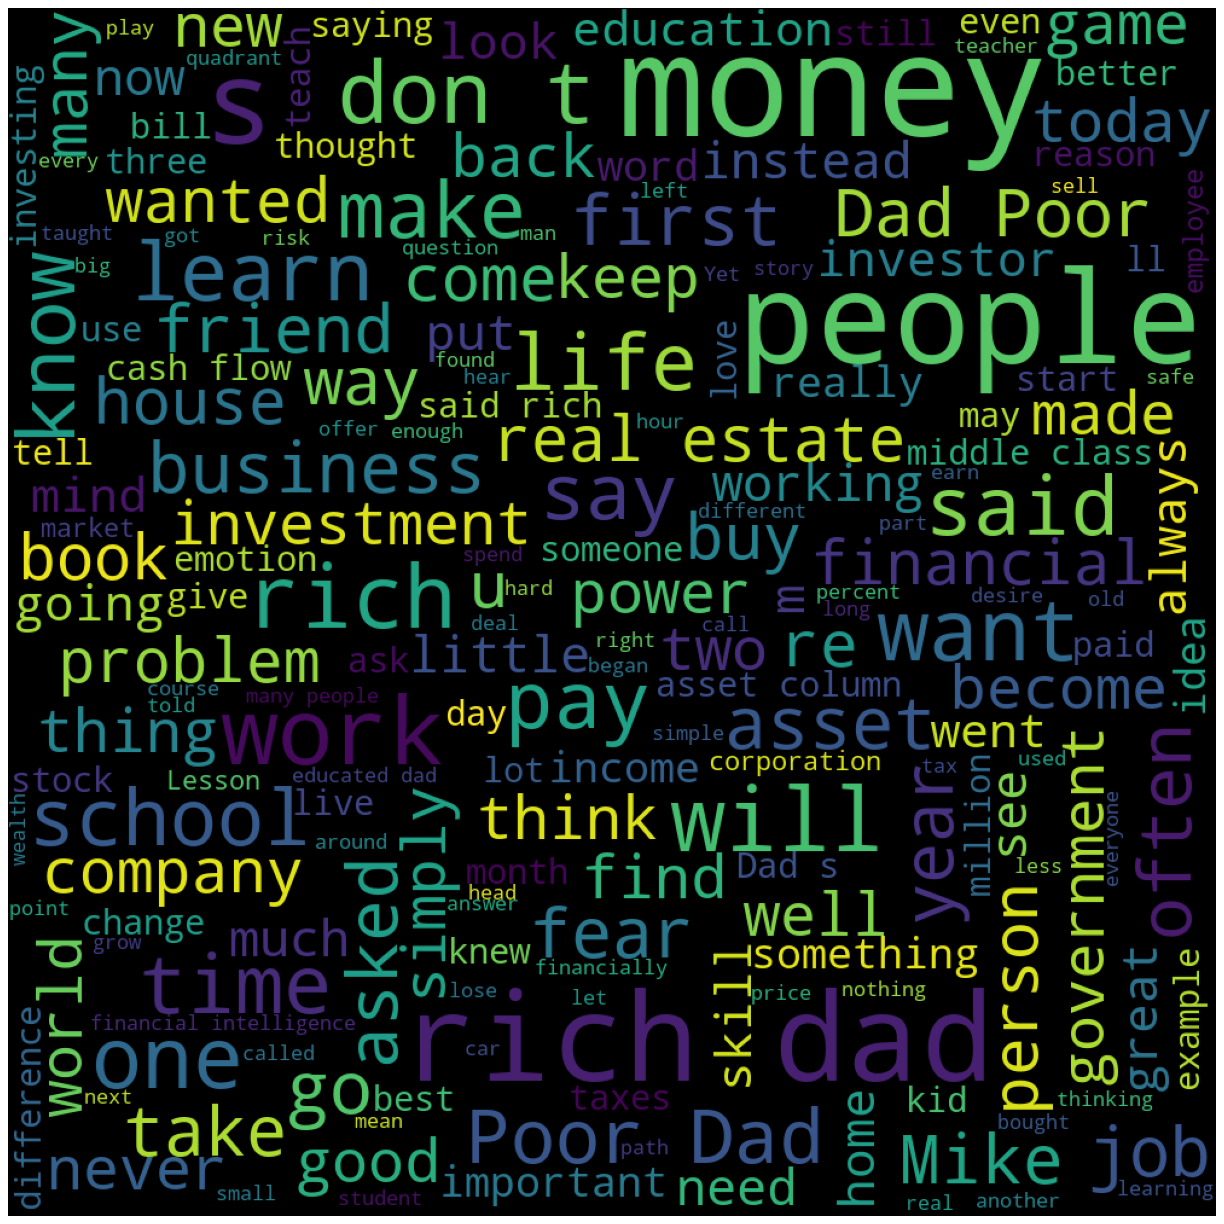

In [37]:
# Generating a wordcloud
from wordcloud import WordCloud
allwords = " ".join([txt for txt in sentence_df["Text"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 42, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

## b. Plotting n-grams

In [38]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

get_top_n_words() returns the n-grams. n can be specified by user

In [39]:
def get_top_n_words(corpus, ngrams,n=None):
    vec = CountVectorizer(ngram_range = (ngrams,ngrams),stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [40]:
common_words = get_top_n_words(sentence_df['Text'],1, 20)
df2 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df2.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words', colors= 'orange')

#### Inference
1. This plot demonstrates top unigrams or single most frequent words in the book.
2. Since this book is related to finance and financial freedom, this plot lines perfectly with the theme.
3. Words like "dad", "money", "rich" are used very often

In [41]:
common_words_2 = get_top_n_words(sentence_df['Text'],2, 20)
df3 = pd.DataFrame(common_words_2, columns = ['ReviewText' , 'count'])
df3.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams', colors= 'purple')

#### Inference
1. words like "rich dad", "poor dad", "real estate" are used together very often
2. This plot demonstrates the frequent use of bigrams

In [51]:
common_words_3 = get_top_n_words(sentence_df['Text'],3, 20)
df4 = pd.DataFrame(common_words_3, columns = ['ReviewText' , 'count'])
df4.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams', colors= 'cyan')

#### Inference
1. This plot represents top 20 trigrams used in the book

## c. Part of Speech

In [43]:
from textblob import TextBlob

In [44]:
import plotly.express as px

Text(0.5, 1.0, 'Top 20 Part-of-Speech tagging for corpus')

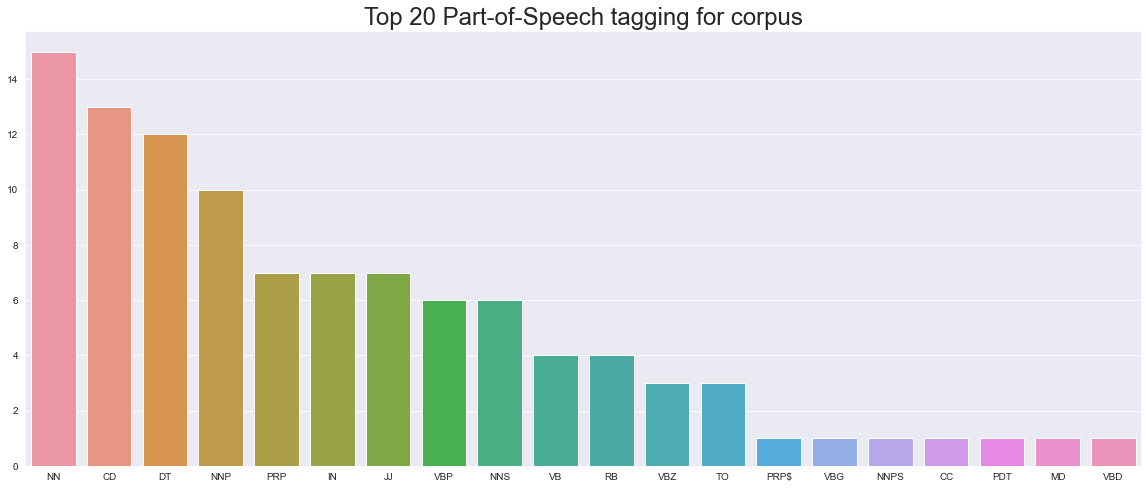

In [45]:
sns.set_style('darkgrid')
plt.figure(figsize=(20,8))
blob = TextBlob(str(sentence_df['Text']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
sns.barplot(x=pos_df.keys(),y=pos_df.values)
plt.title('Top 20 Part-of-Speech tagging for corpus', fontsize = 24)
# pos_df.iplot(
#     kind='bar',
#     xTitle='POS',
#     yTitle='count', 
#     title='Top 20 Part-of-speech tagging for corpus')

#### Inference
1. This plot represents the frequency of occurance of part-of-speech in the book "Rich Dad Poor Dad"
2. Proper nouns are used most often in the book <br>
#### labels = 
1. 'NN': 'Noun'
2. 'CD': 'numeral, cardinal'
3. 'JJ': 'adjective or numeral ordinal'
4. 'NNS': 'noun, proper, singular'
5. 'DT': 'determiner'
6. 'VBP': 'verb, base,a plural'
7. 'IN': 'preposition or conjunction, subordinating'
8. 'WP':	'Wh-pronoun'
9. 'PRP$':	'Possessive pronoun'
10.  'VBG':	'Verb, gerund/present participle'
11. 'CC': 'conjunction, coordinating'
12. 'RB':	'Adverb'
13. 'VBD':	'Verb, past tense'
14. 'NNP': 'noun, proper, plural'

## d. No. of pages

Text(0.5, 1.0, 'Number of pages in each book')

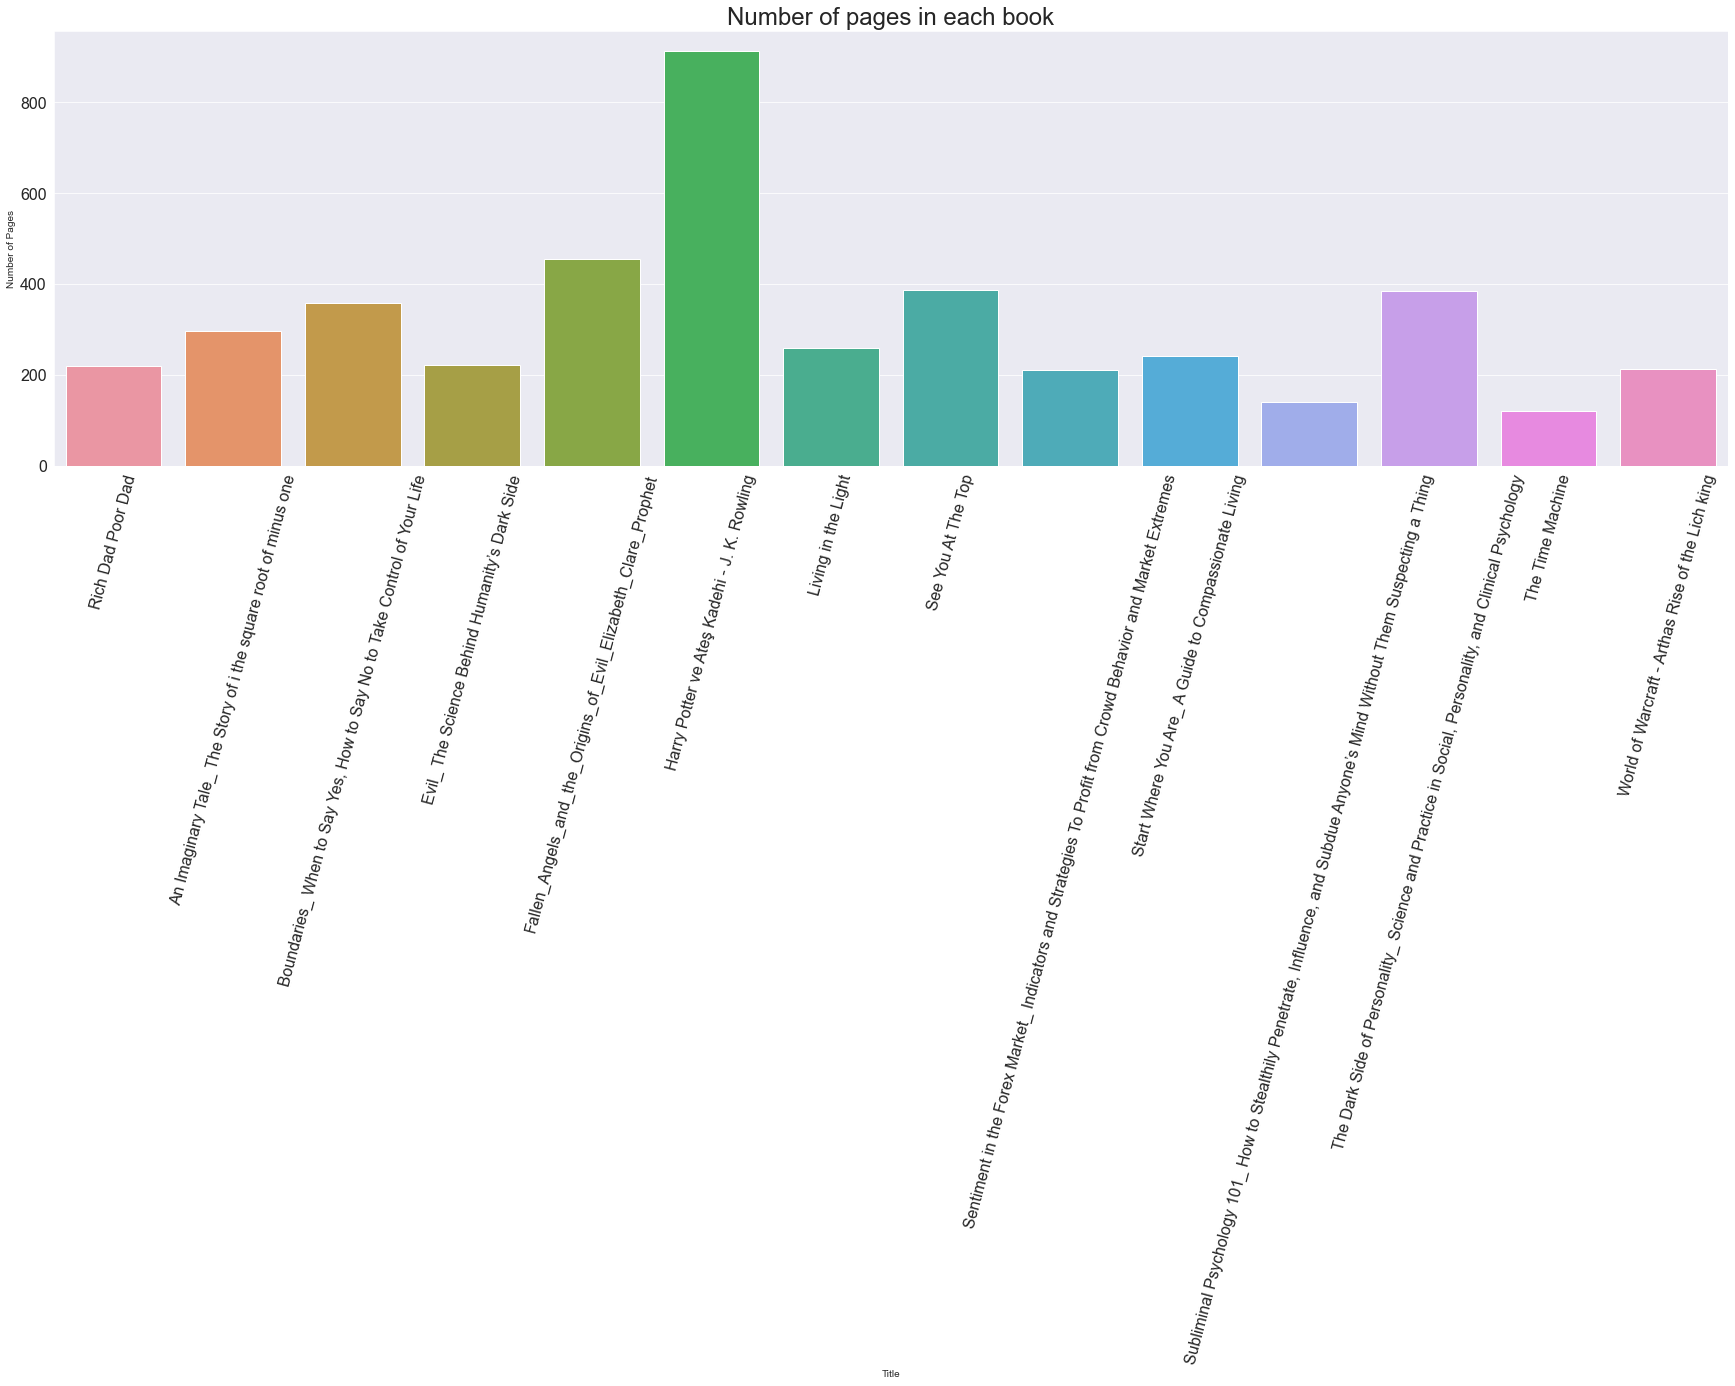

In [46]:
plt.figure(figsize=(30,8))
sns.barplot(x = df['Title'], y = df['Number of Pages'])
plt.xticks(rotation = 75, fontsize = 16)
plt.yticks(fontsize = 16)
plt.title('Number of pages in each book', fontsize = 24)

#### Inference
1. This plot represents the number of pages in each book
2. "Harry Potter vs Ates Kadehi" has highest no. of pages
3. "The Dark side of personality" contains least no. of pages

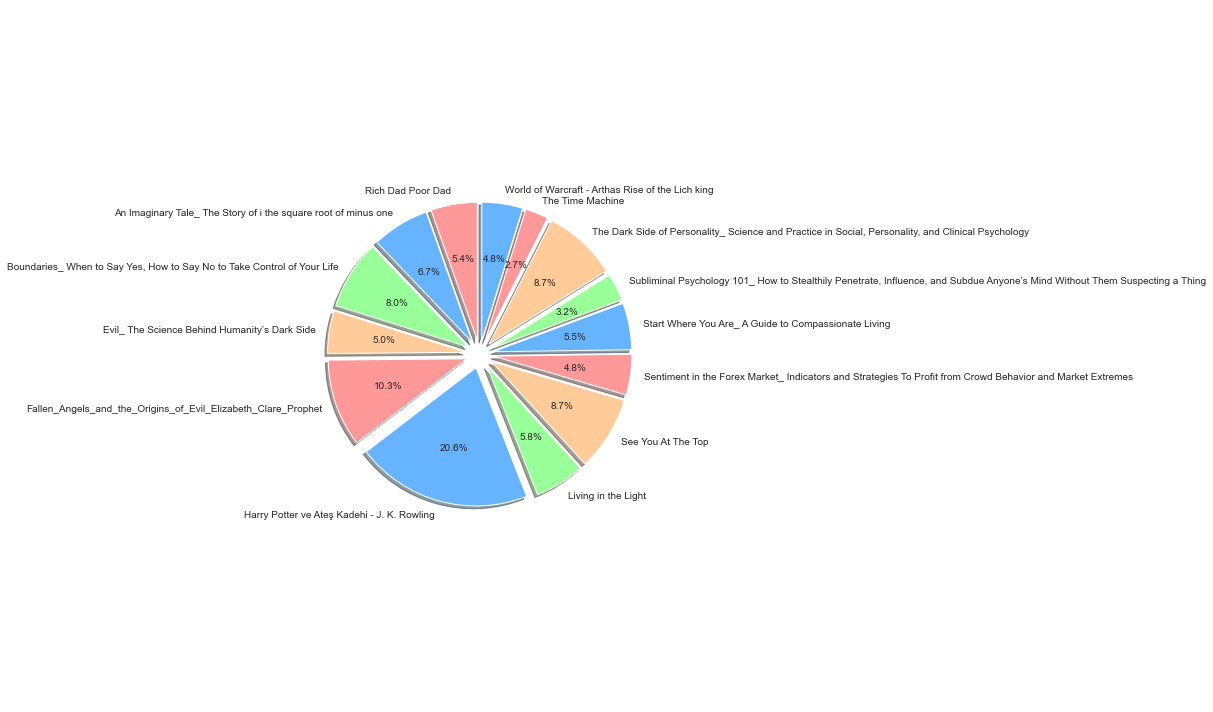

In [47]:
# Pie chart for total number of pages
labels = ['Rich Dad Poor Dad', 'An Imaginary Tale_ The Story of i the square root of minus one', 'Boundaries_ When to Say Yes, How to Say No to Take Control of Your Life', 'Evil_ The Science Behind Humanity’s Dark Side', 'Fallen_Angels_and_the_Origins_of_Evil_Elizabeth_Clare_Prophet', 'Harry Potter ve Ateş Kadehi - J. K. Rowling', 'Living in the Light', 'See You At The Top', 'Sentiment in the Forex Market_ Indicators and Strategies To Profit from Crowd Behavior and Market Extremes', 'Start Where You Are_ A Guide to Compassionate Living', 'Subliminal Psychology 101_ How to Stealthily Penetrate, Influence, and Subdue Anyone’s Mind Without Them Suspecting a Thing', 'The Dark Side of Personality_ Science and Practice in Social, Personality, and Clinical Psychology', 'The Time Machine', 'World of Warcraft - Arthas Rise of the Lich king']
sizes = [241, 297, 357, 221, 455, 912, 258, 386, 211, 242, 141, 384, 120, 212]
explode = [0.1]*14
#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
fig1, ax1 = plt.subplots(figsize = (15,10))
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()

#### Inference
1. This plot is a better representative of the number of pages in each book.
2. Bigger pie represents greater no. of pages

## e. Relationship between number of pages and length of text

In [57]:
df1 = df.copy()
len_text = []
for i in df['Text']:
    len_text.append(len(i))
df1['Length_of_Text'] = len_text

In [58]:
px.scatter(df1, x = 'Length_of_Text', y = 'Number of Pages', size = 'Number of Pages', size_max=60, color = 'Title', hover_name= 'Title')

#### Inferences
1. This plot represents the relationship between length of text and number of pages in each book.
2. Bigger bubble represents higher number of pages.
3. Each color corresponds to different book.
4. Length of text is directly proportional to number of pages
5. It is interesting to note that "Fallen Angels and the Origins of Evil" has 455 number of pages which is higher than "See you at the Top" and "The Dark Side of Personality" but the Length of text in it is less. This indicates that bigger font was used while publishing the book.
6. "World of Warcraft" has around 0.6M words but the number of pages used was 212 as compared to "An Imaginary Tale-The Story of i the square root of minus one" which is 297. This indicates that the text might be closely oriented or smaller fontsize is used.

In [59]:
df1

,Title,Author,Number of Pages,Text,Clean Text,Length_of_Text
0,Rich Dad Poor Dad,Robert Kiyosaki and Sharon Lechter,220,“Rich Dad Poor Dad is a starting point for an...,“ rich dad poor dad starting point anyone look...,367969
1,An Imaginary Tale_ The Story of i the square r...,Paul J. Nahin,297,An Imaginary Tale\n\n An Imaginary Tale\n\n...,an imaginary tale an imaginary tale the story ...,579858
2,"Boundaries_ When to Say Yes, How to Say No to ...","Henry Cloud, John Townsend",357,01.Boundaries 6/7/01 5:04 PM Page 2\n\nRes...,01.boundaries 6/7/01 5:04 pm page 2 resources ...,671388
3,Evil_ The Science Behind Humanity’s Dark Side,Julia Shaw,221,Also\tby\tDr.\tJulia\tShaw\n\nThe\tMemory\tIl...,also dr. julia shaw the memory illusion copyri...,480848
4,Fallen_Angels_and_the_Origins_of_Evil_Elizabet...,Elizabeth Clare Prophet,455,\n\n1 \n\n \n\n \n\n \n\n2 \n\n \n\n \n\n \...,1 2 3 fallen angels and the origins ...,640195
5,Harry Potter ve Ateş Kadehi - J. K. Rowling,J.K. Rowling,912,Harry Potter\n\nve\n\nAteş Kadehi\n\nJ. K. Ro...,harry potter ateş kadehi j. k. rowling 2000 b...,1186774
6,Living in the Light,Shakti Gawain,258,LIL Quark-FM 1/22/01 8:42 AM Page i\n\nLIV...,lil quark-fm 1/22/01 8:42 am page living the l...,381884
7,See You At The Top,Zig Ziglar,386,I BELIEVE \n\nYou can get everything in li...,i believe you get everything life want help en...,797439
8,Sentiment in the Forex Market_ Indicators and ...,Jamie Saettele,211,P1: a/b\nfm\n\nP2: c/d\n\nQC: e/f\n\nT1: g\n\...,p1 a/b fm p2 c/d qc e/f t1 g jwbk195-saettele ...,336485
9,Start Where You Are_ A Guide to Compassionate ...,Pema Chodron,242,This page intentionally left blank.\nThis pag...,this page intentionally left blank this page i...,304961


In [70]:
import seaborn as sns
import numpy as np

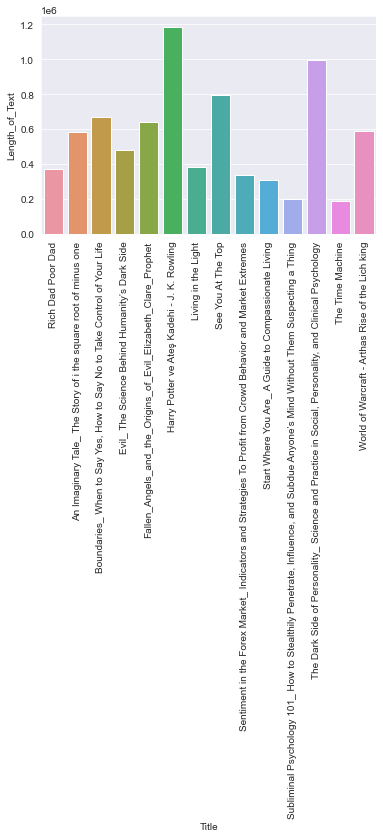

In [74]:
sns.barplot(x='Title',y='Length_of_Text',data=df1, estimator=np.median)
plt.xticks(rotation=90)
plt.show()